# ANN code preparation
1. Load in the data
* MNIST dataset
* 10 digits (0 to 9)
* Already included in Tensorflow
2. Build the model
* Sequential dense layers ending with multiclass logistic regression
3. Train the model
* Same as before
4. Evaluate the model
5. Make predictions
* Being able to see what the neural network is doing wrong might be helpful

In [25]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

## 1. Load in the data

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [6]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [7]:
# scale the rgb in x_train and x_test
x_train, x_test = x_train/255.0, x_test/255.0

In [12]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

## 2. Build the model

In [16]:
RANDOM_SEED = 101

In [17]:
# create the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(rate=0.2, seed=RANDOM_SEED),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

In [19]:
# early stopping callback
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                             patience=10,
                                              mode='min',
                                             restore_best_weights=True)

In [20]:
# compile the model
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

## 3. Train the model

In [21]:
# train the model - with early stopping callback
r = model.fit(x_train, y_train,
              validation_data=(x_test, y_test), 
              epochs=200,
             callbacks=early_stop)

Epoch 1/200
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2987 - accuracy: 0.9128 - val_loss: 0.1360 - val_accuracy: 0.9599
Epoch 2/200
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1455 - accuracy: 0.9567 - val_loss: 0.1006 - val_accuracy: 0.9691
Epoch 3/200
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1078 - accuracy: 0.9662 - val_loss: 0.0833 - val_accuracy: 0.9738
Epoch 4/200
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0884 - accuracy: 0.9728 - val_loss: 0.0763 - val_accuracy: 0.9742
Epoch 5/200
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0768 - accuracy: 0.9756 - val_loss: 0.0739 - val_accuracy: 0.9753
Epoch 6/200
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0666 - accuracy: 0.9793 - val_loss: 0.0697 - val_accuracy: 0.9784
Epoch 7/200
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0609 - accuracy: 0.9802 - val_loss: 0.0704 - val_ac

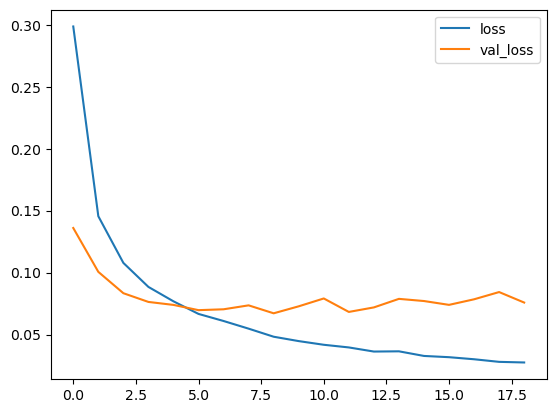

In [22]:
# plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

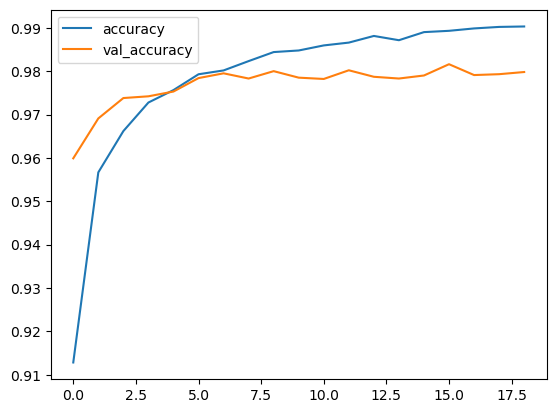

In [23]:
# plot accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

## 4. Evaluate the model

In [24]:
# Evaluate the model
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 0s 723us/step - loss: 0.0671 - accuracy: 0.9800
[0.06711646169424057, 0.9800000190734863]


In [26]:
# plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


313/313 [==============================] - 0s 753us/step
Confusion matrix, without normalization
[[ 970    1    0    0    2    1    2    1    2    1]
 [   0 1128    3    1    0    0    1    0    2    0]
 [   2    2 1014    0    2    0    2    8    2    0]
 [   0    0    5  990    0    4    0    4    3    4]
 [   0    0    6    0  964    0    2    1    0    9]
 [   2    0    0    9    1  868    3    1    3    5]
 [   4    3    0    1    4    4  937    1    4    0]
 [   1    8    8    2    0    0    0 1002    1    6]
 [   4    3    2    4    4    4    0    4  948    1]
 [   1    4    0    3    8    2    0    8    4  979]]


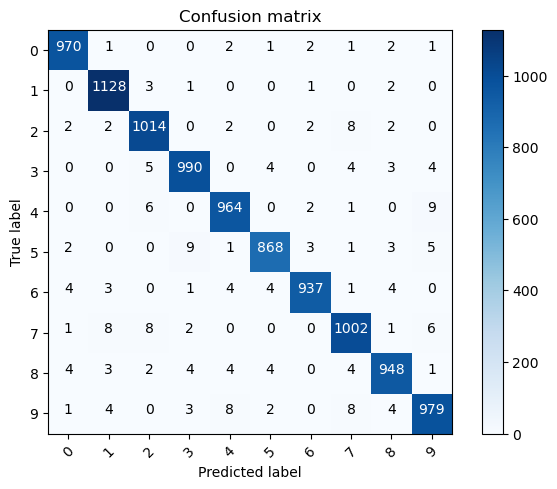

In [27]:
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc. 

In [28]:
# show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]

In [41]:
# grab a random case to plot
i = np.random.choice(misclassified_idx)

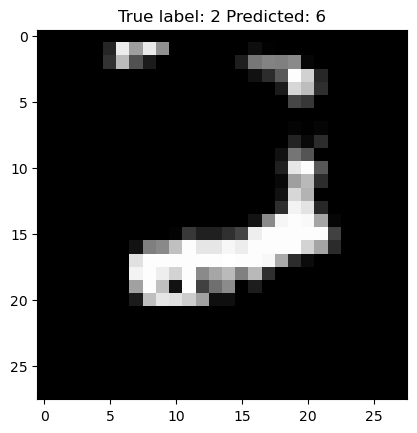

In [42]:
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));

## 5. Save model

In [55]:
# save the model
model.save('mnist_image_classification.h5')